In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

!pip install tensorboard ultralytics
!pip install ultralytics --upgrade

from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi


0: 480x640 1 id, 287.5ms
Speed: 16.9ms preprocess, 287.5ms inference, 20.2ms postprocess per image at shape (1, 3, 480, 640)


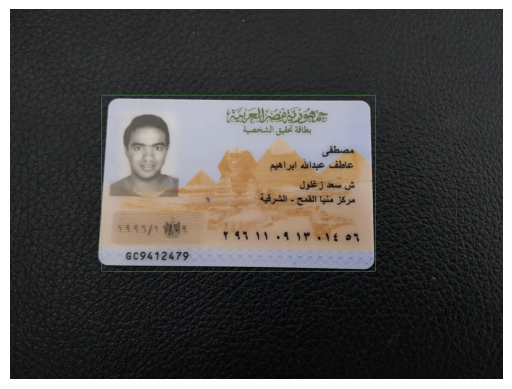

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model (you can try any one )
model = YOLO("/kaggle/input/yolo-model-1/pytorch/default/1/best.pt")

# Load a test image
image_path = "/kaggle/input/test-images/images/15-2-_jpg.rf.151788da6440f2355c931c10c70cdd99.jpg"
image = cv2.imread(image_path)
results = model(image)

# Plot the image with detections
for result in results:
    # Plot boxes on image
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


0: 480x640 1 Address, 1 Birth, 1 Factory, 1 ID_F, 1 Name, 115.6ms
Speed: 3.8ms preprocess, 115.6ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)


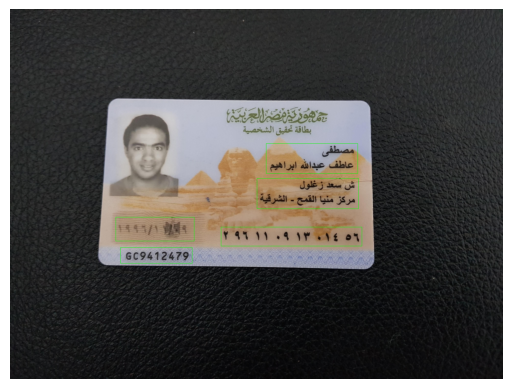

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model (you can try any one )
model = YOLO("/kaggle/input/yolo-model-2/pytorch/default/1/best.pt")

# Load a test image
image_path = "/kaggle/input/test-images/images/15-2-_jpg.rf.151788da6440f2355c931c10c70cdd99.jpg"
image = cv2.imread(image_path)
results = model(image)

# Plot the image with detections
for result in results:
    # Plot boxes on image
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


0: 416x640 1 id, 112.9ms
Speed: 4.6ms preprocess, 112.9ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 Gender, 1 ID_B, 1 Occup, 1 Rel, 1 Start, 1 Status, 1 end, 95.4ms
Speed: 3.2ms preprocess, 95.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
✅ Cropped fields saved in: /kaggle/working/fields/


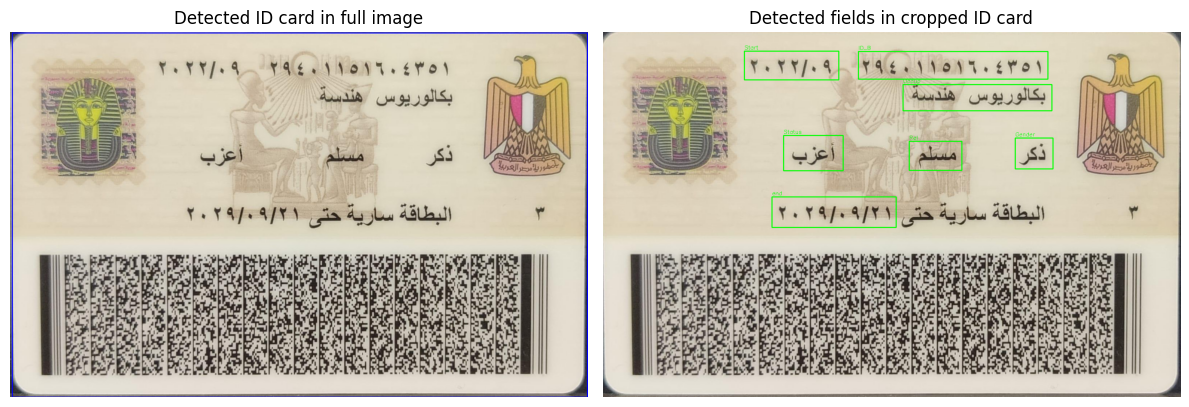

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load both models
model1 = YOLO("/kaggle/input/yolo-model-1/pytorch/default/1/best.pt")  # Detect ID
model2 = YOLO("/kaggle/input/yolo-model-2/pytorch/default/1/best.pt")  # Detect fields

# Load test image
image_path = "/kaggle/input/test-images/images/mohamed-heshamBack_jpg.rf.6c76b3ec4b59be68ca6f39c02c822182.jpg"
image = cv2.imread(image_path)
image_copy = image.copy()

# Output folder to save cropped fields
output_dir = "/kaggle/working/fields/"
os.makedirs(output_dir, exist_ok=True)

# --- Step 1: Detect ID card using model1 ---
result1 = model1(image)[0]

if len(result1.boxes) == 0:
    print("❌ No ID card detected.")
else:
    # Get the first detected ID card bounding box
    id_box = result1.boxes.xyxy[0].cpu().numpy().astype(int)
    x1, y1, x2, y2 = id_box

    # Draw ID card bounding box on original image
    cv2.rectangle(image_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue box

    # Crop the ID card
    id_crop = image[y1:y2, x1:x2]

    # --- Step 2: Detect fields inside cropped ID using model2 ---
    result2 = model2(id_crop)[0]

    for i, (box, cls_id) in enumerate(zip(result2.boxes.xyxy, result2.boxes.cls)):
        fx1, fy1, fx2, fy2 = map(int, box.cpu().numpy())
        label = model2.names[int(cls_id.item())]

        # Draw field boxes in the cropped image
        cv2.rectangle(id_crop, (fx1, fy1), (fx2, fy2), (0, 255, 0), 2)  # Green box
        cv2.putText(id_crop, label, (fx1, fy1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

        # Crop field and save
        field_crop = id_crop[fy1:fy2, fx1:fx2]
        filename = f"{label}_{i}.jpg"
        cv2.imwrite(os.path.join(output_dir, filename), field_crop)

    print(f"✅ Cropped fields saved in: {output_dir}")

    # --- Show both images ---
    plt.figure(figsize=(12, 6))

    # Image with ID box
    plt.subplot(1, 2, 1)
    plt.title("Detected ID card in full image")
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    # Cropped ID with fields
    plt.subplot(1, 2, 2)
    plt.title("Detected fields in cropped ID card")
    plt.imshow(cv2.cvtColor(id_crop, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [5]:
!pip install easyocr
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
import easyocr
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image

Looking in indexes: https://download.pytorch.org/whl/cpu


Progress: |██████████████████████████████████████████████████| 100.0% Complete
=== DETECTION RESULTS ===
Raw Detection: ٢٩٤٠١١٥١٦٠٤٣٥١
Converted Number: 29401151604351
Digit Count: 14


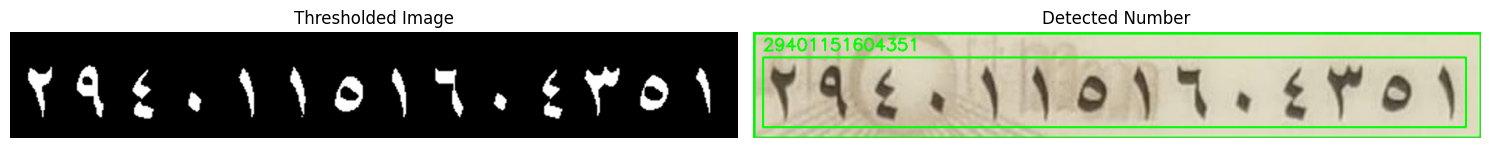

In [6]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Initialize OCR with Arabic and English
reader = easyocr.Reader(['ar', 'en'])

# Digit mapping (Arabic to English)
DIGIT_MAP = {
    '٠': '0', '۰': '0',
    '١': '1', '۱': '1',
    '٢': '2', '۲': '2',
    '٣': '3', '۳': '3',
    '٤': '4', '۴': '4',
    '٥': '5', '۵': '5',
    '٦': '6', '۶': '6',
    '٧': '7', '۷': '7',
    '٨': '8', '۸': '8',
    '٩': '9', '۹': '9',
    '0': '0', '1': '1', '2': '2', '3': '3', '4': '4',
    '5': '5', '6': '6', '7': '7', '8': '8', '9': '9'
}

def simple_threshold(img):
    """Basic threshold preprocessing"""
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
    return cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

def convert_digits(text):
    """Convert Arabic numerals to English"""
    return ''.join([DIGIT_MAP.get(c, '') for c in text if c in DIGIT_MAP])

# Load image
image_path = '/kaggle/working/fields/ID_B_0.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found. Check the path.")
else:
    # Simple preprocessing
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    processed = simple_threshold(image_rgb)
    processed = cv2.resize(processed, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    
    # OCR with whole-text detection
    results = reader.readtext(processed,
                           paragraph=True,
                           batch_size=4,
                           width_ths=1.5,
                           text_threshold=0.4,
                           allowlist=''.join(DIGIT_MAP.keys()))
    
    # Process results
    output_image = cv2.resize(image_rgb.copy(), None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    full_number = ""
    
    if results:
        best_result = max(results, key=lambda x: len(convert_digits(x[1])))
        arabic_number = best_result[1]
        full_number = convert_digits(arabic_number)
        
        # Draw single bounding box
        (top_left, _, bottom_right, _) = best_result[0]
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))
        
        cv2.rectangle(output_image, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(output_image, full_number, 
                   (top_left[0], top_left[1] - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    
    # Display results
    print("\n=== DETECTION RESULTS ===")
    if full_number:
        print(f"Raw Detection: {arabic_number}")
        print(f"Converted Number: {full_number}")
        print(f"Digit Count: {len(full_number)}")
    else:
        print("No numbers detected. Try adjusting the threshold value.")
    
    # Show images
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(processed)
    plt.title("Thresholded Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(output_image)
    plt.title("Detected Number" if full_number else "No Detection")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

Processing 7 images...



  0%|          | 0/7 [00:00<?, ?it/s]

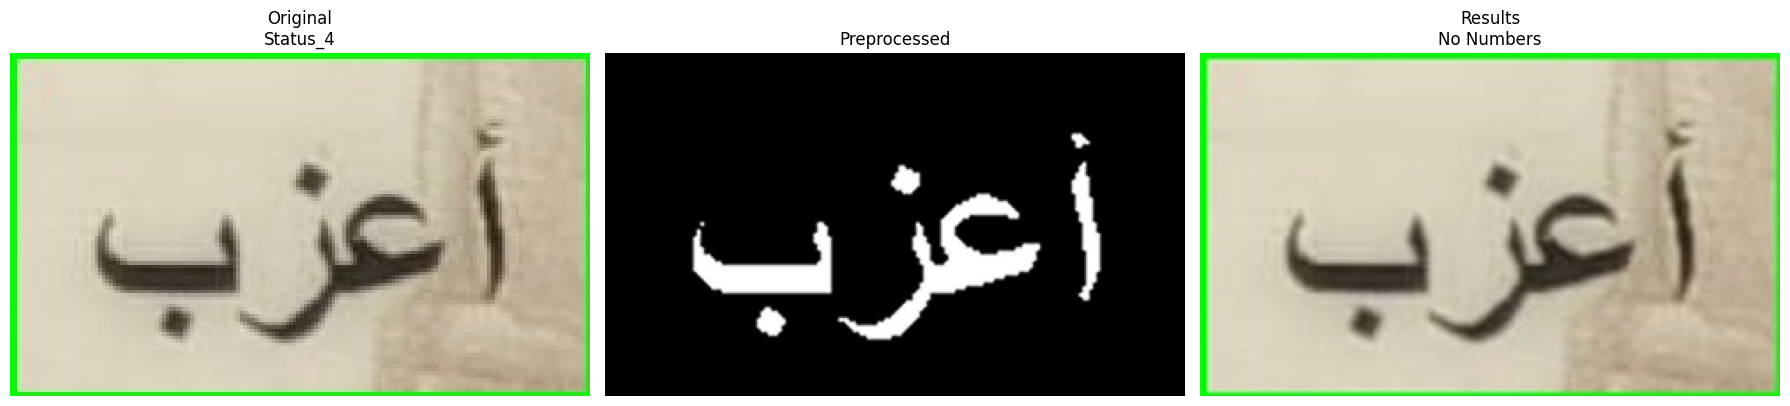

 14%|█▍        | 1/7 [00:02<00:12,  2.09s/it]


Image: Status_4.jpg
Original Text: اعزب
Extracted Numbers: 
------------------------------------------------------------


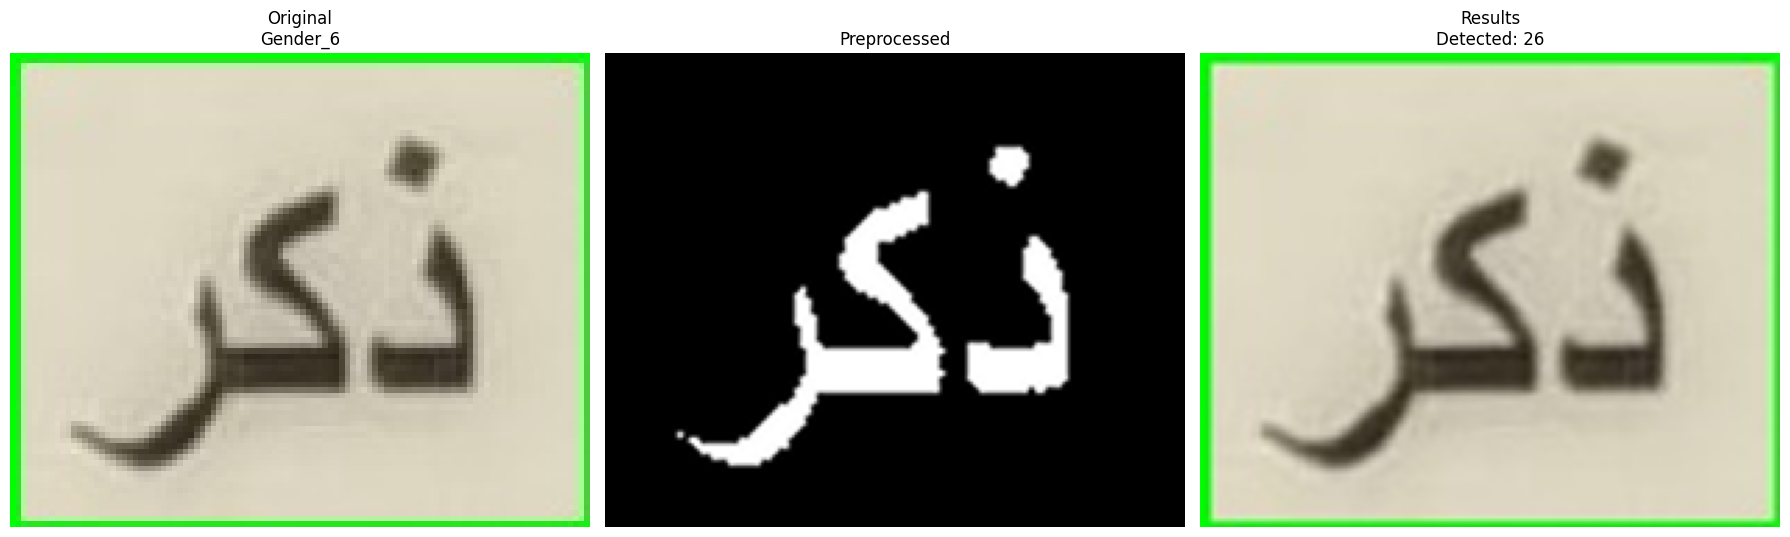

 29%|██▊       | 2/7 [00:03<00:09,  1.83s/it]


Image: Gender_6.jpg
Original Text: ذكر
Extracted Numbers: 26
------------------------------------------------------------


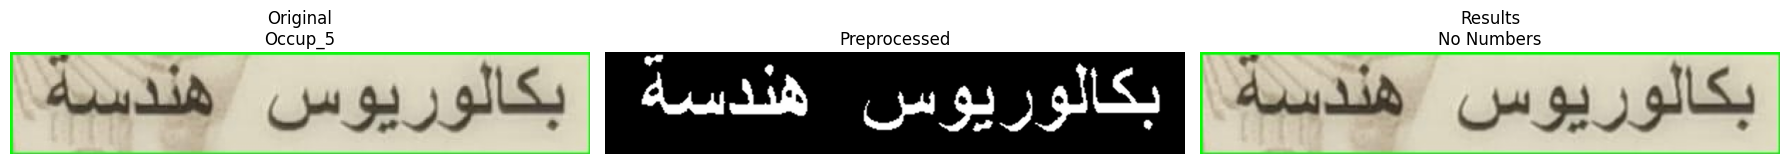

 43%|████▎     | 3/7 [00:07<00:10,  2.75s/it]


Image: Occup_5.jpg
Original Text: بكالوريوس هندسة
Extracted Numbers: 
------------------------------------------------------------


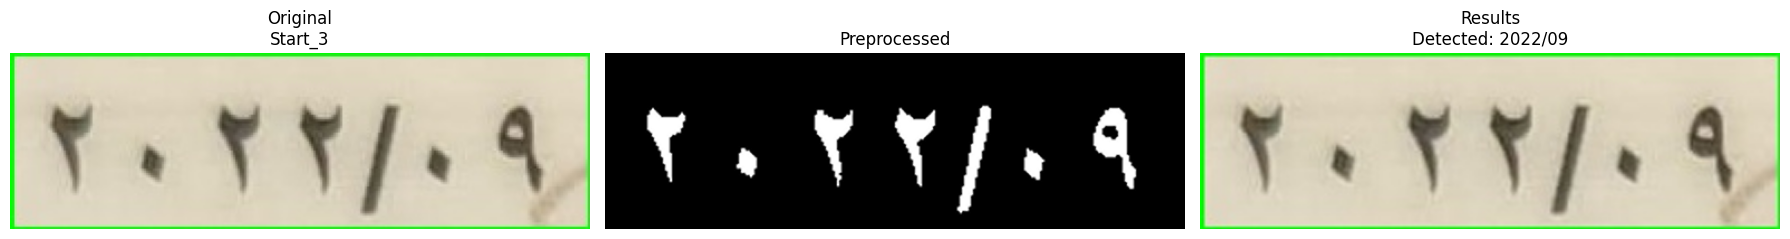

 57%|█████▋    | 4/7 [00:10<00:08,  2.70s/it]


Image: Start_3.jpg
Original Text: ٩ ٢١٠ ٢ ٠ ٢
Extracted Numbers: 2022/09
------------------------------------------------------------


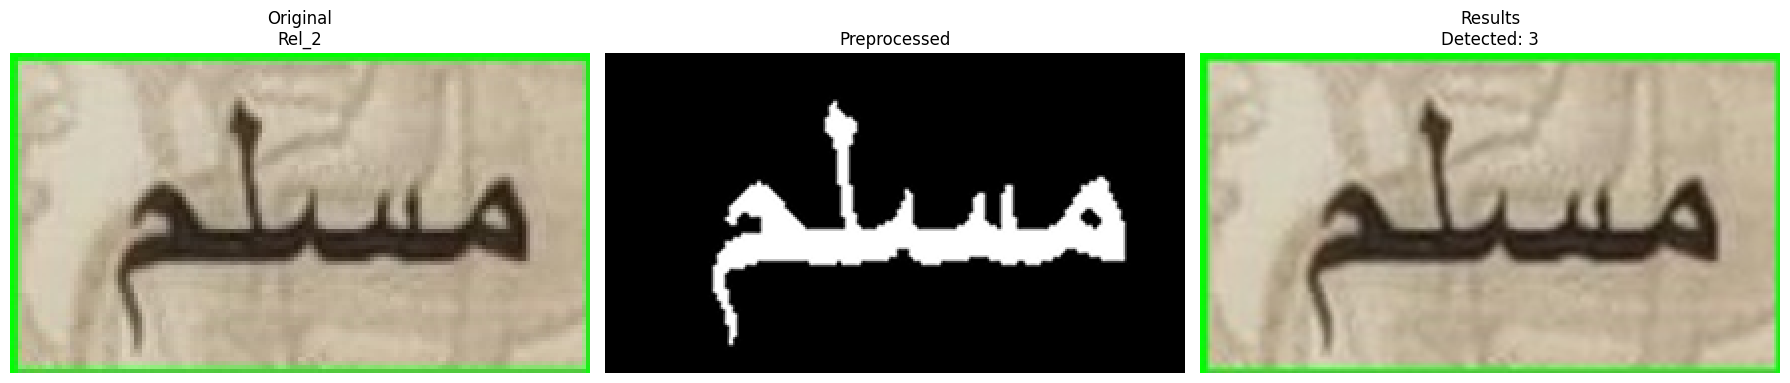

 71%|███████▏  | 5/7 [00:11<00:04,  2.32s/it]


Image: Rel_2.jpg
Original Text: مسلم
Extracted Numbers: 3
------------------------------------------------------------


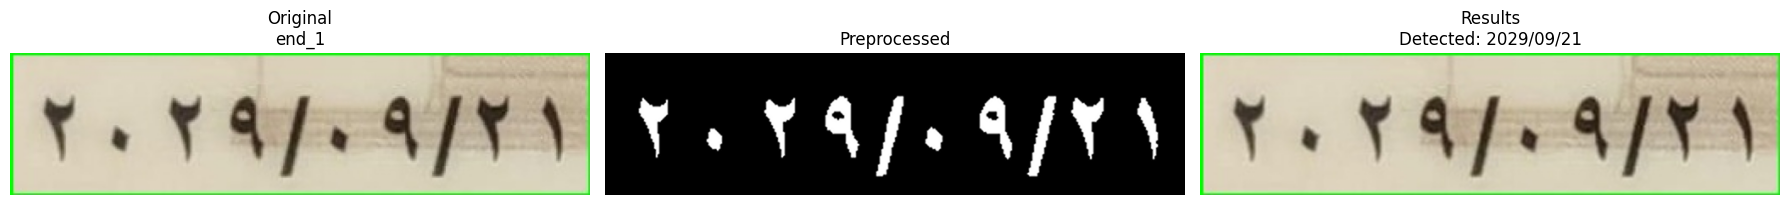

 86%|████████▌ | 6/7 [00:15<00:02,  2.77s/it]


Image: end_1.jpg
Original Text: ١ ٩٢ ٩١٠ ٢ ٠ ٢
Extracted Numbers: 2029/09/21
------------------------------------------------------------


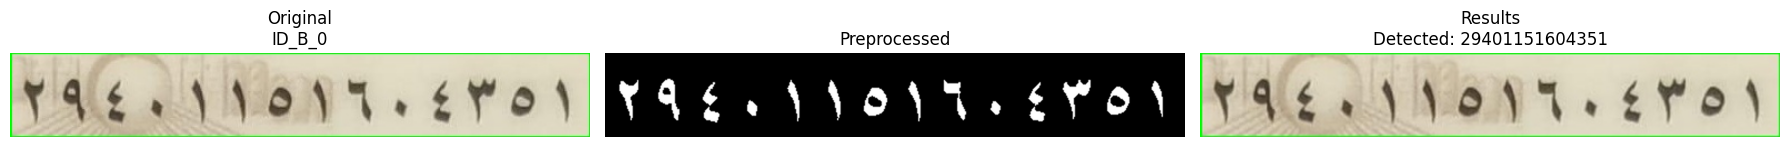

100%|██████████| 7/7 [00:20<00:00,  2.91s/it]


Image: ID_B_0.jpg
Original Text: ٤٣٥١ ٠ ٦ ١ ٥ ١ ١ ٠ ٤ ٢٩
Extracted Numbers: 29401151604351
------------------------------------------------------------

Results saved to extracted_data.csv


,image_id,original_text,extracted_numbers
0,Status_4,اعزب,
1,Gender_6,ذكر,26
2,Occup_5,بكالوريوس هندسة,
3,Start_3,٩ ٢١٠ ٢ ٠ ٢,2022/09
4,Rel_2,مسلم,3
5,end_1,١ ٩٢ ٩١٠ ٢ ٠ ٢,2029/09/21
6,ID_B_0,٤٣٥١ ٠ ٦ ١ ٥ ١ ١ ٠ ٤ ٢٩,29401151604351


In [7]:
import easyocr
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import re

# Initialize OCR with Arabic and English
reader = easyocr.Reader(['ar', 'en'])

# Arabic to English digit map
DIGIT_MAP = {
    '٠': '0', '۰': '0',
    '١': '1', '۱': '1',
    '٢': '2', '۲': '2',
    '٣': '3', '۳': '3',
    '٤': '4', '۴': '4',
    '٥': '5', '۵': '5',
    '٦': '6', '۶': '6',
    '٧': '7', '۷': '7',
    '٨': '8', '۸': '8',
    '٩': '9', '۹': '9'
}

def simple_threshold(img):
    """Basic grayscale + simple thresholding"""
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    return cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

def is_probably_number(text):
    """Check if text is likely a number using regex"""
    arabic_num_pattern = r'^[\d٠١٢٣٤٥٦٧٨٩۰۱۲۳۴۵۶۷۸۹]+$'
    return bool(re.fullmatch(arabic_num_pattern, text))

def extract_numbers(text):
    """More accurate number extraction with context awareness"""
    if is_probably_number(text):
        return ''.join([DIGIT_MAP.get(c, c) for c in text if c in DIGIT_MAP or c.isdigit()])
    
    numbers = []
    current_num = []
    for c in text:
        if c in DIGIT_MAP or c.isdigit():
            current_num.append(DIGIT_MAP.get(c, c))
        else:
            if current_num:
                numbers.append(''.join(current_num))
                current_num = []
    if current_num:
        numbers.append(''.join(current_num))
    
    return ' '.join(numbers) if numbers else ""

def fix_common_ocr_errors(text, image_id):
    """Fix misinterpretation of slash as 1 in dates only if not ID image"""
    if 'id' not in image_id.lower():
        # Replace '1' between two digits with slash
        return re.sub(r'(?<=\d)1(?=\d)', '/', text)
    return text

def clean_text(text):
    """Clean Arabic/English OCR output from non-text artifacts"""
    text = re.sub(r'[^\w\s\u0600-\u06FF]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def show_visualization(original, processed, result, image_id, detected_text):
    """Visual display of OCR pipeline"""
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.title(f"Original\n{image_id}")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(processed)
    plt.title("Preprocessed")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(result)
    result_title = f"Detected: {detected_text}" if detected_text else "No Numbers"
    plt.title(f"Results\n{result_title}")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def process_image(image_path):
    """Process a single image and return OCR results"""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return None
    
    image_id = os.path.splitext(os.path.basename(image_path))[0]
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Simple preprocessing
    processed = simple_threshold(image_rgb)
    processed = cv2.resize(processed, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    
    # OCR pass
    number_results = reader.readtext(processed,
                                     paragraph=True,
                                     batch_size=4,
                                     text_threshold=0.5,
                                     allowlist=''.join(DIGIT_MAP.keys()))
    
    text_results = reader.readtext(processed,
                                   paragraph=True,
                                   batch_size=4,
                                   text_threshold=0.4)
    
    output_image = cv2.resize(image_rgb.copy(), None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    
    numbers = []
    for res in number_results:
        text = res[1]
        if is_probably_number(text):
            numbers.append(extract_numbers(text))
    
    if not numbers:
        for res in text_results:
            text = res[1]
            extracted = extract_numbers(text)
            if extracted:
                numbers.append(extracted)
                (top_left, _, bottom_right, _) = res[0]
                top_left = tuple(map(int, top_left))
                bottom_right = tuple(map(int, bottom_right))
                cv2.rectangle(output_image, top_left, bottom_right, (0, 255, 0), 2)
                cv2.putText(output_image, extracted, 
                            (top_left[0], top_left[1] - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    full_number = fix_common_ocr_errors(' '.join(numbers), image_id) if numbers else ""
    
    show_visualization(image_rgb, processed, output_image, image_id, full_number)
    
    return {
        'image_id': image_id,
        'original_text': clean_text(text_results[0][1]) if text_results else "",
        'extracted_numbers': full_number
    }

def process_dataset(dataset_path, output_csv='extracted_data.csv'):
    """Batch process all images in a folder"""
    results = []
    supported_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
    
    image_files = [f for f in os.listdir(dataset_path) 
                   if f.lower().endswith(supported_extensions)]
    
    if not image_files:
        print(f"No images found in {dataset_path}")
        return
    
    print(f"Processing {len(image_files)} images...\n")
    
    for image_file in tqdm(image_files):
        image_path = os.path.join(dataset_path, image_file)
        
        try:
            result = process_image(image_path)
            if result:
                results.append(result)
                print(f"\nImage: {image_file}")
                print(f"Original Text: {result['original_text']}")
                print(f"Extracted Numbers: {result['extracted_numbers']}")
                print("-" * 60)
        except Exception as e:
            print(f"\nError processing {image_file}: {str(e)}")
            results.append({
                'image_id': os.path.splitext(image_file)[0],
                'original_text': 'ERROR',
                'extracted_numbers': 'ERROR'
            })
    
    # Save to CSV
    df = pd.DataFrame(results)
    df.to_csv(output_csv, index=False, encoding='utf-8-sig')
    print(f"\nResults saved to {output_csv}")
    return df

# Example usage
dataset_folder = "/kaggle/working/fields"
process_dataset(dataset_folder)


In [9]:
import csv
import os

# Prepare output path
csv_output_path = '/kaggle/working/ocr_results.csv'

# Extract just the image filename (e.g., "ID_B_0.jpg") to use as ID
image_id = os.path.basename(image_path)

# Ensure there's a value even if nothing was detected
output_code = full_number if full_number else "NOT_DETECTED"

# Write header only if the file doesn't exist yet
file_exists = os.path.isfile(csv_output_path)
with open(csv_output_path, mode='a', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    if not file_exists:
        writer.writerow(['image_id', 'extracted_code'])  # header
    writer.writerow([image_id, output_code])

print(f"OCR result saved to CSV: {csv_output_path}")


OCR result saved to CSV: /kaggle/working/ocr_results.csv



=== DETECTION RESULTS ===
Raw Detection: ٢٩٤٠١١٥١٦٠٤٣٥١
Converted Number: 29401151604351
Digit Count: 14
✅ OCR result saved to CSV: ocr_results.csv


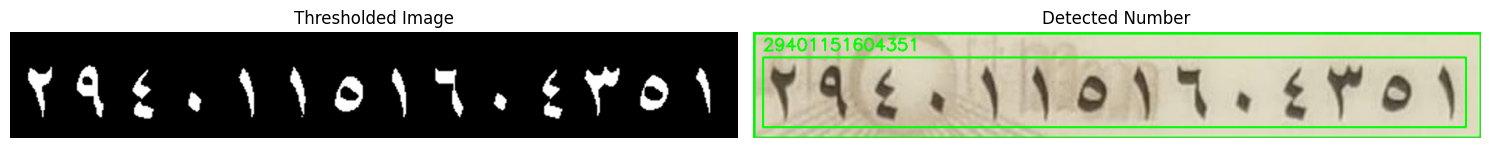

In [10]:
import easyocr
import os
import cv2
import matplotlib.pyplot as plt
import csv

# === Initialize OCR Reader (Arabic + English) ===
reader = easyocr.Reader(['ar', 'en'])

# === Arabic to English Digit Mapping ===
DIGIT_MAP = {
    '٠': '0', '۰': '0', '١': '1', '۱': '1',
    '٢': '2', '۲': '2', '٣': '3', '۳': '3',
    '٤': '4', '۴': '4', '٥': '5', '۵': '5',
    '٦': '6', '۶': '6', '٧': '7', '۷': '7',
    '٨': '8', '۸': '8', '٩': '9', '۹': '9',
    '0': '0', '1': '1', '2': '2', '3': '3',
    '4': '4', '5': '5', '6': '6', '7': '7',
    '8': '8', '9': '9'
}

def simple_threshold(img):
    """Basic threshold preprocessing"""
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
    return cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

def convert_digits(text):
    """Convert Arabic numerals to English"""
    return ''.join([DIGIT_MAP.get(c, '') for c in text if c in DIGIT_MAP])

def run_ocr(image_path, save_to_csv=True, show_output=True):
    image = cv2.imread(image_path)

    if image is None:
        print("❌ Error: Image not found. Check the path.")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    processed = simple_threshold(image_rgb)
    processed = cv2.resize(processed, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    results = reader.readtext(processed,
                              paragraph=True,
                              batch_size=4,
                              width_ths=1.5,
                              text_threshold=0.4,
                              allowlist=''.join(DIGIT_MAP.keys()))

    output_image = cv2.resize(image_rgb.copy(), None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    full_number = ""

    if results:
        best_result = max(results, key=lambda x: len(convert_digits(x[1])))
        arabic_number = best_result[1]
        full_number = convert_digits(arabic_number)

        # Draw bounding box
        (top_left, _, bottom_right, _) = best_result[0]
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))
        cv2.rectangle(output_image, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(output_image, full_number,
                    (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # === Show Detection Results ===
    print("\n=== DETECTION RESULTS ===")
    if full_number:
        print(f"Raw Detection: {arabic_number}")
        print(f"Converted Number: {full_number}")
        print(f"Digit Count: {len(full_number)}")
    else:
        print("No numbers detected. Try adjusting the threshold value.")

    # === Save Result to CSV ===
    if save_to_csv:
        csv_output_path = 'ocr_results.csv'
        image_id = os.path.basename(image_path)
        output_code = full_number if full_number else "NOT_DETECTED"
        file_exists = os.path.isfile(csv_output_path)

        with open(csv_output_path, mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            if not file_exists:
                writer.writerow(['image_id', 'extracted_code'])  # Header
            writer.writerow([image_id, output_code])

        print(f"✅ OCR result saved to CSV: {csv_output_path}")

    # === Display Images (Optional) ===
    if show_output:
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(processed)
        plt.title("Thresholded Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(output_image)
        plt.title("Detected Number" if full_number else "No Detection")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# === RUN ===
if __name__ == '__main__':
    test_image_path = '/kaggle/working/fields/ID_B_0.jpg'  # Update this path if needed
    run_ocr(test_image_path)
